<center>
<img src =data/images/hi-hello.gif width = 500 />
</center>

### Mid Term - Take Home
In your F1 homework, I told you Max Verstappen was committed by contract with Red Bull to going to one designer's fashion show, and *one only*. There are 30 fashion shows at the SPRING 2024 READY-TO-WEAR FASHION SHOW. If you commit to going to *one and just one* designer's fashion show as well, the probability to meet Max is the probability that "*Max and I have the same birthday if there are 30 days in the year*": 1/30.

If each one of the F1 drivers for the current season (listed on the F1 web site) also commits to going to *one and one only* of these fashion shows, the probability you will meet a F1 driver if you also go to *one and only one* of these shows is exactly as if each driver has 30 days to have a "*birthday*" and there are $n$ "*drivers*" in class and I want to find the probability that I share the same birthday with a driver: We need to be careful to remove "*intersections*" when computing the cumulative probability for all drivers (since they could go the same fashion show: that is an intersection). The answer is $n/30 - C_{n-1}^{n-1}/30^{n-1} - C^{n-1}_{n-2}/30^{n-2} - .... - C^{n-1}_{n - (n - 2)}/30^{n - (n - 2)}$ where $n$ is the number of F1 drivers.

>**Note**: $C_{n}^{k}$ is something called the choose function. You pronounce that thing $n$ *choose* $k$. It represents how many ways there are to choose $k$ items from a set of a total of $n$ items and is equal to $\frac{n!}{k!(n-k)!}$.

Now we are going to make the problem more interesting.

Let's say there are $n=20$ F1 drivers and 30 fashion shows.

Part A (10 points): Fashion shows are expensive. Each F1 driver goes to one and only one fashion show. You think F1 drivers are the coolest people on the planet and you really want to meet one. So you decide to plot the probability mass function (pmf) for meeting one (any driver will do) as a function of the number of shows you attend, from one show, to all shows. Then you can decide what the right tradefoff is between luck and gambling your money away by buying fashion show tickets. Plot this graph F.

Part B (10 points): How does the graph change if instead of going to one and only one fashion show, drivers go to *exactly two*, *exactly three*, ...., *exactly 30*? if $m$ is the number of distinct shows that each and every F1 driver goes to, plot the graph F for $m=2$, $m=5$, $m=10$, $m=20$, $m=30$.

Part C (10 points): How does the graph change if instead of going to one and only one fashion show, drivers go to *up to one*, *up to two*, *up to three*, ...., *up to 30* fashion shows? if $m$ is the number of distinct shows that a F1 driver goes to, then the use case *this driver goes to up to 10 fashion shows* means $m \le 10$. In other words, that driver can decide to go to no fashion shows at all, 1 fashion show, 2 fashion shows, ... up to 10 fashion shows with uniform probability. Plot the graph F for $m=1$, $m=2$, $m=5$, $m=10$, $m=20$, $m=30$.

Hint: Remember what we said about all possible ways to solve a data science problem.

In [17]:
from math import factorial

def choose(n, c):
    """Number of ways to choose c items from a list of n items."""
    return factorial(n) // (factorial(n - c) * factorial(c))

def i_meet_driver(total_drivers, total_shows):
    if total_drivers == 1:
        return 1 / total_shows
    
    probability = (total_drivers) / total_shows
    
    for x in range(2, total_drivers):
        probability -= choose(total_drivers, x) / (total_shows ** x)
            
    return probability

In [18]:
total_drivers = 20
total_shows = 30

#### Part A

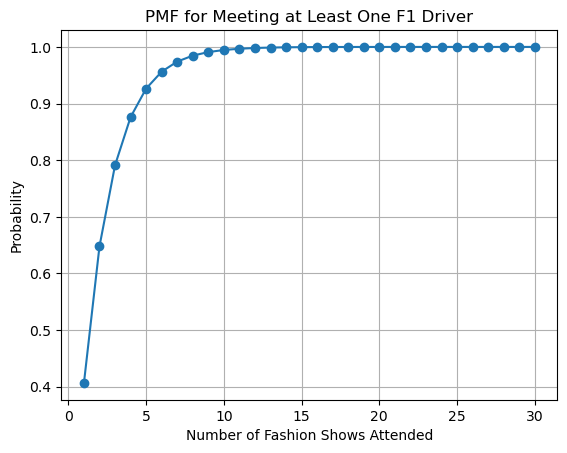

In [19]:
import matplotlib.pyplot as plt

probabilities = []
num_shows_attended = []

# Calculate the PMF for each number of shows attended
for k in range(1, total_shows + 1):
    prob_meeting_at_least_one = 1 - ((1 - i_meet_driver(total_drivers, total_shows)) ** k)
    probabilities.append(prob_meeting_at_least_one)
    num_shows_attended.append(k)

# Plot the PMF
plt.plot(num_shows_attended, probabilities, marker='o')
plt.title('PMF for Meeting at Least One F1 Driver')
plt.xlabel('Number of Fashion Shows Attended')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


# print(probabilities)


<center>
<img src =data/images/firststep.gif width = 500 />
</center>

#### Part B

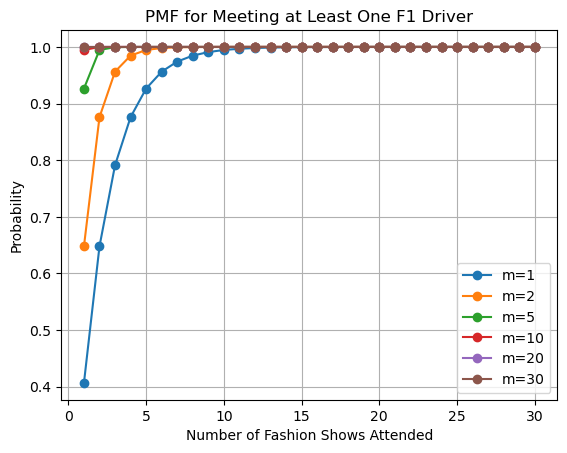

In [20]:
import matplotlib.pyplot as plt
import math

def calculate_pmf(total_drivers, total_shows, m):
    probabilities = []
    for k in range(1, total_shows + 1):
        prob_meeting_at_least_one = 1 - ((1 - i_meet_driver(total_drivers, total_shows)) ** (m * k))
        probabilities.append(prob_meeting_at_least_one)
    return probabilities


num_shows_attended = list(range(1, total_shows + 1))

# Values of m to consider
exactly_m_shows = [1, 2, 5, 10, 20, 30]

prob_dict = {}

# Plot the PMFs for each value of m
for m in exactly_m_shows:
    probabilities = calculate_pmf(total_drivers, total_shows, m)
    plt.plot(num_shows_attended, probabilities,  marker='o', label=f'm={m}')
    prob_dict[m] = probabilities

plt.title('PMF for Meeting at Least One F1 Driver')
plt.xlabel('Number of Fashion Shows Attended')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

# # Print the probabilities for each value of m
# for m, probs in prob_dict.items():
#     print(f'm={m}:', probs)


#### Part C

In [21]:
def i_meet_driver_upto_m(total_drivers, total_shows, max_shows_per_driver):
    prob_not_attend = 1/(max_shows_per_driver+1)
    prob_attend = sum([i/total_shows * prob_not_attend for i in range(1, max_shows_per_driver+1)])
    prob_not_meeting_a_single_driver = 1-prob_attend
    prob_not_meeting_a_any_driver = prob_not_meeting_a_single_driver ** total_drivers
    return prob_not_meeting_a_any_driver
    

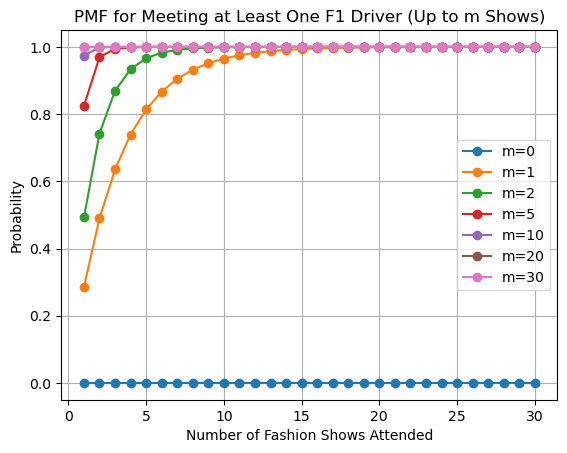

In [35]:
import matplotlib.pyplot as plt
import math


# # Function to calculate the PMF for a given value of m
# def calculate_pmf(total_drivers, total_shows, m):
#     probabilities = []
#     for k in num_shows_attended:
#         prob_not_meeting = ((total_shows - 1) / total_shows) ** (total_drivers * m)        
#         prob_meeting_at_least_one = 1 - prob_not_meeting ** k
        
#         probabilities.append(prob_meeting_at_least_one)
#     return probabilities

# Function to calculate the PMF for a given value of m
def calculate_pmf(total_drivers, total_shows, m):
    probabilities = []
    for k in num_shows_attended:
        prob_not_meeting = i_meet_driver_upto_m(total_drivers, total_shows, m) ** k   
        prob_meeting_at_least_one = 1 - prob_not_meeting
        
        probabilities.append(prob_meeting_at_least_one)
    # print(probabilities)
    return probabilities

# Initialize lists to store probabilities and the number of shows attended
num_shows_attended = list(range(1, total_shows + 1))

# Values of m to consider
upto_m_shows = [0, 1, 2, 5, 10, 20, 30]

# Plot the PMFs for each value of m
for m in upto_m_shows:
    probabilities = calculate_pmf(total_drivers, total_shows, m)

    plt.plot(num_shows_attended, probabilities, marker='o', label=f'm={m}')

plt.title('PMF for Meeting at Least One F1 Driver (Up to m Shows)')
plt.xlabel('Number of Fashion Shows Attended')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

#### We tried to solve with other way as well

<center>
<img src =data/images/expppppp.gif width = 500 />
</center>

In [292]:
class ProbDist(dict):
    """A Probability Distribution; an {outcome: probability} mapping."""
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0

In [ ]:
from fractions import Fraction

def p(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency} pairs."""
    if is_predicate(event):
        event = such_that(event, space)
        
    if isinstance(space, ProbDist):
        return sum(space[o] for o in space if o in event)
    else:
        return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, space): 
    """The outcomes in the sample pace for which the predicate is true.
    If space is a set, return a subset {outcome,...} with outcomes where predicate(element) is true;
    if space is a ProbDist, return a ProbDist {outcome: frequency,...} with outcomes where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in space if predicate(o)}

In [ ]:
def joint(A, B, sep=' '):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b] 
                        for a in A 
                        for b in B})

In [ ]:
def cross(A, B):
    """The set of ways of concatenating one item from collection A with one from B."""
    return {a +" " + str(b): 1 for a in A for b in B}

In [ ]:
total_designer_shows = 30 #took data from https://www.vogue.com/fashion-shows
total_drivers = 20

In [ ]:
designer_shows = [i for i in range(1, total_designer_shows+1)]
# designer_shows

In [ ]:
my_poss = cross('Z', designer_shows)
len(my_poss)

## Careful before running the below cell, it will take alot of time
<center>
<img src =data/images/aging-time.gif width = 500 />
</center>

In [ ]:
for i in range(total_drivers):
    x_poss = cross(chr(ord('A') + i), designer_shows)
    my_poss = joint(ProbDist(my_poss), ProbDist(x_poss))

len(my_poss)

In [ ]:
def i_meet_any_driver(outcome):
    words = outcome.split()
    x = words[1]
    # print(x)
    word_len = len(words)
    for i in range(1, word_len, 2):
        # print(i)
        if words[i] != x:
            return False
        
    return True

In [ ]:
p(i_meet_any_driver, my_poss)

<center>
<img src =data/images/ok-bye.gif width = 500 />
</center>